In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
hourly_temperature_2007_to_2016 = pd.read_csv('LFPB.txt', delimiter=",", parse_dates=['valid'], usecols=['valid','tmpf'])
hourly_temperature_2007_to_2016.columns = ['timestamp', 'tmp']
hourly_temperature_2007_to_2016.head()
hourly_temperature_2007_to_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172825 entries, 0 to 172824
Data columns (total 2 columns):
timestamp    172825 non-null datetime64[ns]
tmp          172683 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 MB


In [3]:
daily_temperature_mean_2007_to_2016 = hourly_temperature_2007_to_2016.resample('d', on='timestamp').mean()
daily_temperature_mean_2007_to_2016.reset_index(inplace=True)
daily_temperature_mean_2007_to_2016.head()

,timestamp,tmp
0,2007-01-01,47.994286
1,2007-01-02,44.900000
2,2007-01-03,45.575000
3,2007-01-04,49.437500
4,2007-01-05,50.704348


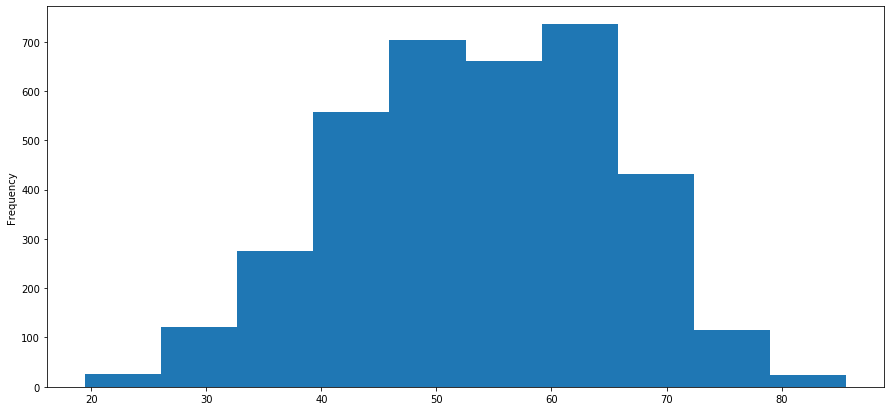

In [4]:
daily_temperature_mean_2007_to_2016['tmp'].plot(kind='hist', figsize=(15,7))

In [5]:
daily_temperature_mean_2007_to_2016['month-day'] = daily_temperature_mean_2007_to_2016['timestamp'].apply( lambda x: x.strftime('%m-%d'))
daily_temperature_mean_2007_to_2016.head()

,timestamp,tmp,month-day
0,2007-01-01,47.994286,01-01
1,2007-01-02,44.900000,01-02
2,2007-01-03,45.575000,01-03
3,2007-01-04,49.437500,01-04
4,2007-01-05,50.704348,01-05


In [6]:

avg_daily_temperature_mean_2007_to_2016 = daily_temperature_mean_2007_to_2016.groupby(['month-day']).mean()
avg_daily_temperature_mean_2007_to_2016.reset_index(inplace=True)
avg_daily_temperature_mean_2007_to_2016 = avg_daily_temperature_mean_2007_to_2016.rename(columns={'tmp':'avg_tmp'})
avg_daily_temperature_mean_2007_to_2016.head()

,month-day,avg_tmp
0,01-01,41.215905
1,01-02,40.504165
2,01-03,41.480984
3,01-04,40.857500
4,01-05,41.115435


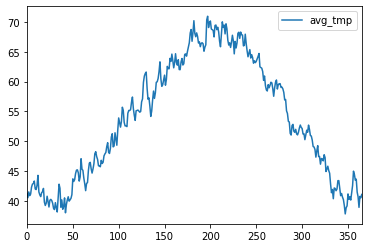

In [7]:
avg_daily_temperature_mean_2007_to_2016.plot()

In [8]:
hourly_temperature_2017 = pd.read_csv('LFPB-2.txt', delimiter=",", parse_dates=['valid'], usecols=['valid','tmpf'])
hourly_temperature_2017.columns = ['timestamp', 'temp2017']
hourly_temperature_2017.head()
hourly_temperature_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17215 entries, 0 to 17214
Data columns (total 2 columns):
timestamp    17215 non-null datetime64[ns]
temp2017     17215 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 269.1 KB


In [9]:
daily_temperature_2017 = hourly_temperature_2017.resample('d', on='timestamp').mean()
daily_temperature_2017.reset_index(inplace=True)
daily_temperature_2017['month-day'] = daily_temperature_2017['timestamp'].apply( lambda x: x.strftime('%m-%d'))
daily_temperature_2017.head()

,timestamp,temp2017,month-day
0,2017-01-01,29.014634,01-01
1,2017-01-02,34.550000,01-02
2,2017-01-03,32.521053,01-03
3,2017-01-04,39.429787,01-04
4,2017-01-05,37.154545,01-05


In [10]:
daily_temperature_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
timestamp    365 non-null datetime64[ns]
temp2017     365 non-null float64
month-day    365 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.7+ KB


In [11]:
avg_daily_temperature_mean_2007_to_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
month-day    366 non-null object
avg_tmp      366 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [12]:
temp_deviation = pd.merge(daily_temperature_2017, avg_daily_temperature_mean_2007_to_2016, on='month-day', how='inner')
temp_deviation.head()

,timestamp,temp2017,month-day,avg_tmp
0,2017-01-01,29.014634,01-01,41.215905
1,2017-01-02,34.550000,01-02,40.504165
2,2017-01-03,32.521053,01-03,41.480984
3,2017-01-04,39.429787,01-04,40.857500
4,2017-01-05,37.154545,01-05,41.115435


In [13]:
nonnumeric_rows_list = pd.to_numeric(temp_deviation['temp2017'], errors='coerce').isnull()
nonnumeric_rows = temp_deviation[nonnumeric_rows_list]
nonnumeric_rows.head()

,timestamp,temp2017,month-day,avg_tmp


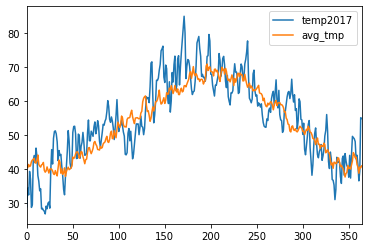

In [14]:
temp_deviation[['temp2017','avg_tmp']].plot()

In [15]:
temp_deviation['tmp_deviation'] = temp_deviation['temp2017'] - temp_deviation['avg_tmp']
temp_deviation.head()

,timestamp,temp2017,month-day,avg_tmp,tmp_deviation
0,2017-01-01,29.014634,01-01,41.215905,-12.201271
1,2017-01-02,34.550000,01-02,40.504165,-5.954165
2,2017-01-03,32.521053,01-03,41.480984,-8.959931
3,2017-01-04,39.429787,01-04,40.857500,-1.427713
4,2017-01-05,37.154545,01-05,41.115435,-3.960889


In [16]:
temp_deviation['tmp_deviation'].describe()

count    365.000000
mean       1.004032
std        6.363221
min      -14.040842
25%       -3.559263
50%        0.861796
75%        5.361114
max       20.470938
Name: tmp_deviation, dtype: float64

In [17]:
temp_deviation.head()

,timestamp,temp2017,month-day,avg_tmp,tmp_deviation
0,2017-01-01,29.014634,01-01,41.215905,-12.201271
1,2017-01-02,34.550000,01-02,40.504165,-5.954165
2,2017-01-03,32.521053,01-03,41.480984,-8.959931
3,2017-01-04,39.429787,01-04,40.857500,-1.427713
4,2017-01-05,37.154545,01-05,41.115435,-3.960889


In [18]:
%store temp_deviation

Stored 'temp_deviation' (DataFrame)
